# <center> Use Sklearn to Train a Logistic Regression Model <br> ~ Purchasing Dataset ~</center>
<center>by: Nicole Woodland, P. Eng. for RoboGarden Inc. </center>

---

## Preamble: Libraries and Set-up

In [2]:
# Import data libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

# Custommize Pandas Defaults for this notebook:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",6)

## Step 1: Read the data into a Dataframe

In [4]:
df = pd.read_csv("dataPurchase.csv")
df

,Age,Salary_(k$),Purchased
0,19,19,0
1,35,20,0
2,26,43,0
...,...,...,...
57,50,20,1
58,36,33,0
59,49,36,1


## Step 2: Visualize the Data

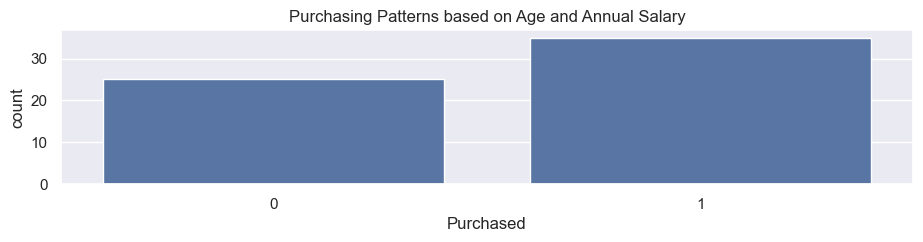

In [14]:
# A bar plot shows us the number of items per class label
plt.figure(figsize=(11,2))
sn.set(style="darkgrid")
ax = sn.countplot(x="Purchased",
                  data=df).set_title('Purchasing Patterns based on Age and Annual Salary')

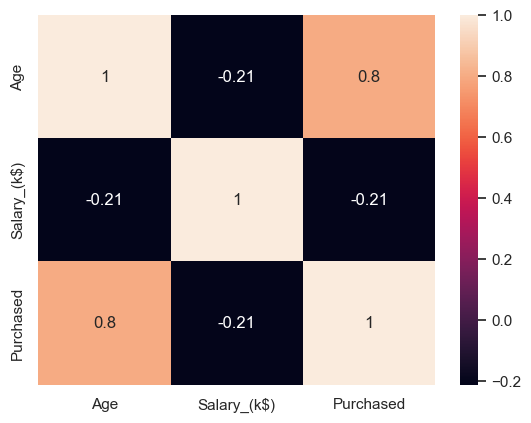

In [16]:
sn.heatmap(df.corr(), annot = True)
plt.show()

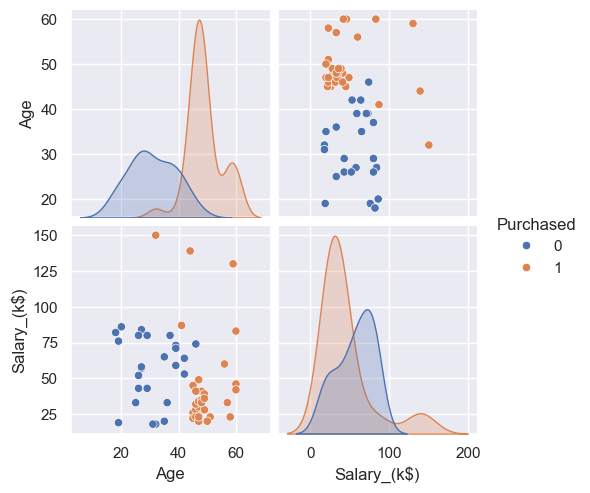

In [18]:
sn.pairplot(data = df, hue = ("Purchased"))
plt.show()

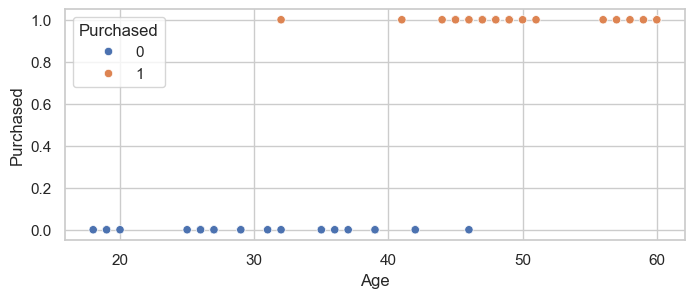

In [20]:
# A scatter plot shows us there is a trend between age affecting purchasing
plt.figure(figsize=(8,3)),sn.set(style="whitegrid")
sn.scatterplot(data = df, x = df["Age"], 
               y = df["Purchased"], 
               hue = df["Purchased"])
plt.show()

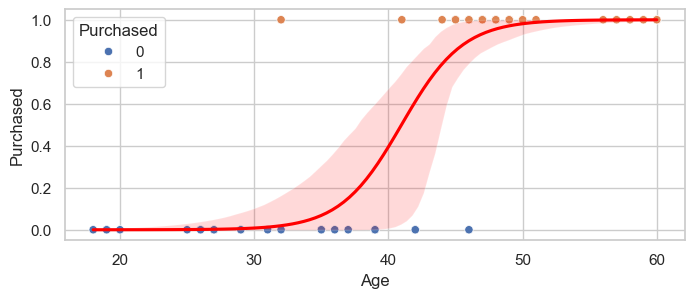

In [22]:
# For visualization sake, we can plot the regression curve showing the max probability of 'making a purchase'
plt.figure(figsize=(8,3)),sn.set(style="whitegrid")
sn.scatterplot(data = df, x = df["Age"], 
               y = df["Purchased"], 
               hue = df["Purchased"])
sn.regplot(x='Age', y='Purchased', data=df, logistic=True, scatter_kws={'s': 50, 'alpha': 0,}, line_kws={'color': 'red'})
plt.show()

## Step 3: Define Input and Output Data

In [24]:
x_columns = 2
X = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values

In [26]:
df

,Age,Salary_(k$),Purchased
0,19,19,0
1,35,20,0
2,26,43,0
...,...,...,...
57,50,20,1
58,36,33,0
59,49,36,1


In [28]:
X

array([[ 19,  19],
       [ 35,  20],
       [ 26,  43],
       [ 27,  57],
       [ 19,  76],
       [ 27,  58],
       [ 27,  84],
       [ 32, 150],
       [ 25,  33],
       [ 35,  65],
       [ 26,  80],
       [ 26,  52],
       [ 20,  86],
       [ 32,  18],
       [ 18,  82],
       [ 29,  80],
       [ 47,  25],
       [ 45,  26],
       [ 46,  28],
       [ 48,  29],
       [ 45,  22],
       [ 47,  49],
       [ 48,  41],
       [ 45,  22],
       [ 46,  23],
       [ 47,  20],
       [ 49,  28],
       [ 47,  30],
       [ 29,  43],
       [ 31,  18],
       [ 60,  46],
       [ 60,  83],
       [ 39,  73],
       [ 59, 130],
       [ 37,  80],
       [ 46,  32],
       [ 46,  74],
       [ 42,  53],
       [ 41,  87],
       [ 58,  23],
       [ 42,  64],
       [ 48,  33],
       [ 44, 139],
       [ 49,  28],
       [ 57,  33],
       [ 56,  60],
       [ 49,  39],
       [ 39,  71],
       [ 47,  34],
       [ 48,  35],
       [ 48,  33],
       [ 47,  23],
       [ 45,

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

## Step 4: Perform any Preprocessing Required


- Not required
- i.e. No categorical columns, feature columns have data in similar ranges so scaling could be done but likely won't hurt this analysis and all values appear complete and consistent.
- Typically we would run our preprocessing steps here regardless to confirm the above, but to keep this notebook succinct, I have ignored this part as the data is clean and ready.

## Step 5: Create Train and Test Sets

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25,
                                                    random_state = 0,
                                                    shuffle = True)

In [36]:
X_train

array([[ 49,  28],
       [ 48,  35],
       [ 32, 150],
       [ 18,  82],
       [ 39,  73],
       [ 48,  33],
       [ 31,  18],
       [ 44, 139],
       [ 39,  59],
       [ 46,  28],
       [ 51,  23],
       [ 47,  30],
       [ 29,  80],
       [ 27,  58],
       [ 60,  83],
       [ 47,  25],
       [ 47,  23],
       [ 45,  22],
       [ 45,  45],
       [ 25,  33],
       [ 32,  18],
       [ 47,  20],
       [ 42,  53],
       [ 45,  26],
       [ 56,  60],
       [ 47,  34],
       [ 50,  20],
       [ 41,  87],
       [ 35,  20],
       [ 20,  86],
       [ 49,  39],
       [ 46,  23],
       [ 27,  84],
       [ 45,  22],
       [ 46,  74],
       [ 47,  49],
       [ 48,  29],
       [ 35,  65],
       [ 58,  23],
       [ 46,  41],
       [ 27,  57],
       [ 19,  19],
       [ 60,  42],
       [ 39,  71],
       [ 57,  33]], dtype=int64)

In [38]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

45 45 15 15


## Step 6: Train a Logistic Regression Classification Model

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
predictions = model.predict(X_test)

In [46]:
predictions

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [48]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

## Step 7: Evaluate the Model

For Classification models, the model score is the Accuracy of the model by default. This is essentially a percentage of correct guesses made by the model.
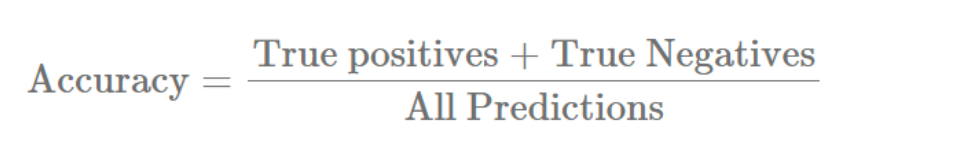

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

This model has a Model Accuracy of 93.3%.
<br> In other words, 93.3% of all guesses made by this model will be the correct class label.

We can display this information visually in a Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

or use Seaborn to make it more clear visually:

In [ ]:
plt.figure(figsize=(4,2))
sn.heatmap(confusion_matrix(y_test, predictions), 
           annot= True).set_title("Purchasing Predictions Heat Map")
plt.show()

In [ ]:
#If you want to be able to access the results, save them to a list:

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [ ]:
print("True Positives:",tp)
print("True Negatives:",tn)
print("False Negatives:",fn)
print("False Positives:",fp)

A Classification Report gives us all the available Classification metrics for each class as well as overall: 
- Recall (how many actual positives are identified?)
- Precision (how accurate the positive predictions are.)
- F1-Score (combine precision and recall to deal with class inbalance)
<br> 
- and the overall Model Accuracy (overall proportion of correct predictions).

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

#### In Binary Classification like this, the other model scores can be calculated from the same model predictions for the Positive (label 1) class: 
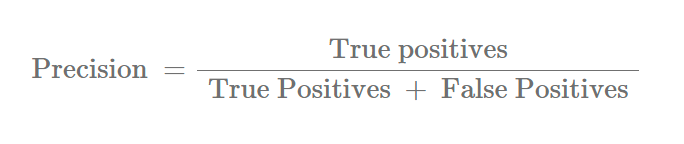
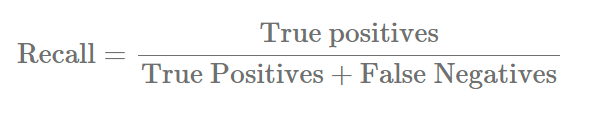
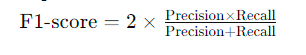

Note: In multiclass classification problems, a weighted average of the classes is returned instead of the Positive Class.

#### The evaluation metrics can also be calculated individually using their sklearn methods, instead of just viewing the classification table from sklearn. 

Harmonic Mean = 2ab / a + b

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score 
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')